In [1]:
import numpy as np
from scipy.optimize import minimize


def f(w1, w2, w3, w4,w5,t):
    return w1*np.exp(-w2 * t) * np.cos(w3 * t) + w4*np.sin(w5*t) 


def f_prime(w1, w2, w3, w4,w5,t):
    return  -w2*np.exp(-w2 * t) * np.cos(w3 * t) - w3*np.exp(-w2 * t)*np.sin(w3*t)+w4*w5*np.cos(w5*t)

def f_double_prime(w1, w2, w3, w4,w5,t):
    return (w2**2)*np.exp(w2*t)*np.cos(w3*t)+2*w2*w3*np.exp(-w2*t)*np.sin(w3*t)-(w3**2)*np.exp(-w2*t)*np.cos(w3*t)-w4*w5*np.sin(w5*t)


# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    


t_data = np.linspace(0, 1, 50)
# print(t_data)
del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    w1,w2, w3, w4,w5 = params
 
    u = f(w1,w2, w3, w4,w5,t_data)
    u_prime = f_prime(w1,w2, w3, w4,w5,t_data)
    u_double_prime = f_double_prime(w1,w2, w3, w4,w5,t_data)
    # print(u_prime)
    # print('===========')
    loss_i = np.sum((DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data))**2)

    eta = 5
    del0_pred = f(w1,w2, w3, w4,w5,0)
    omega0_pred = f_prime(w1,w2, w3, w4,w5,0) + ws

    # print(del0_pred)
    # print(del_0_v)

    loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b += eta * (omega_0_v - omega0_pred) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # print(loss_b)
    # raise Exception
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss




# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264]
# initial_params = [ -0.4163907468183215 , 1.6278233681841594 , -0.05992067931253551 , 0.173421644359757 , 0.31074421606512426 ]
initial_params = [1,1,1,1,1]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

w1,w2, w3, w4,w5 = result.x


print("Optimized w2:", w2)
print("Optimized w3:", w3)
print("Optimized w4:", w4)
# print("Optimized d:", d)

Current loss: 139.21640756465382
Current loss: 48.249082038057296
Current loss: 35.286813073364996
Current loss: 30.688990086369078
Current loss: 30.03779528160131
Current loss: 28.7911748813245
Current loss: 26.4117501377051
Current loss: 23.145097683905664
Current loss: 22.93655330096234
Current loss: 22.72127155416191
Current loss: 22.644143249548677
Current loss: 22.623708721914017
Current loss: 22.60865623318897
Current loss: 22.581390503774763
Current loss: 22.53067746444706
Current loss: 22.460092189604392
Current loss: 22.3984809746641
Current loss: 22.364064483725905
Current loss: 22.324274491775043
Current loss: 22.30589447399217
Current loss: 22.277295542132308
Current loss: 22.248562188170123
Current loss: 22.236562659734496
Current loss: 22.223718220252707
Current loss: 22.207799409308354
Current loss: 22.198687121454327
Current loss: 22.187279225966922
Current loss: 22.18421062845052
Current loss: 22.179875635516755
Current loss: 22.177821244154785
Current loss: 22.176410

[38.41109196 38.38988215 38.3695411  38.35005884 38.33142492 38.31362844
 38.29665804 38.28050194 38.26514795 38.25058351 38.23679567 38.22377116
 38.21149636 38.19995735 38.18913993 38.17902961 38.16961166 38.1608711
 38.15279275 38.14536123 38.13856094 38.13237617 38.126791   38.12178943
 38.11735531 38.11347239 38.11012434 38.10729475 38.10496716 38.10312507
 38.10175193 38.10083121 38.10034634 38.10028079 38.10061803 38.10134159
 38.10243503 38.10388198 38.10566614 38.10777129 38.11018131 38.11288017
 38.11585197 38.11908092 38.12255138 38.12624784 38.13015495 38.1342575
 38.13854047 38.14298901]


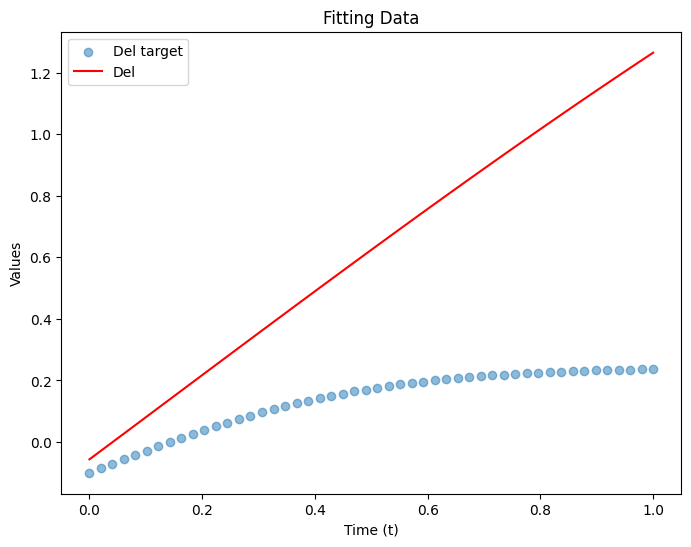

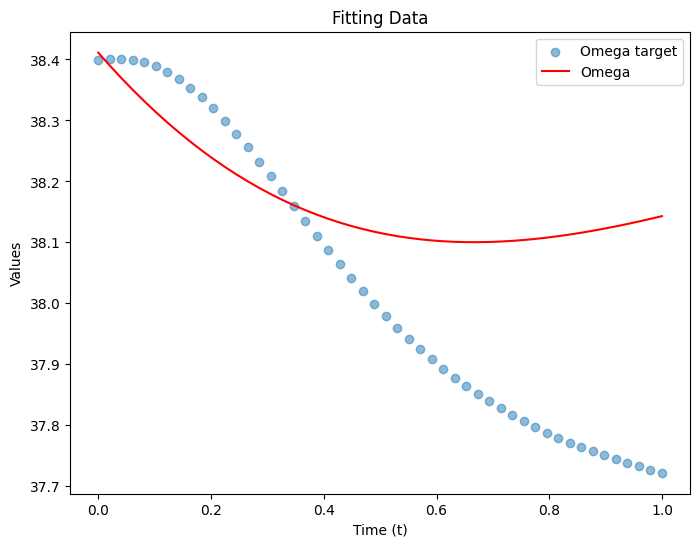

In [2]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
fitted_values = f(w1,w2, w3, w4,w5,t_data)
plt.plot(t_data, fitted_values, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)
fitted_values = f_prime(w1,w2, w3, w4,w5,t_data)+ws
print(fitted_values)
plt.plot(t_data, fitted_values, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

plt.show()
